# Stage Equancy - Test Technique
Ettore Hidoux, Janvier 2023

# Instructions
La démarche de recherche et l'utilisation du code est présentée dans le notebook `test.ipynb` et le code répondant aux différentes questions est dans le fichier `test.py`.

## A propos d’Equancy  
Equancy est un cabinet de conseil international, basé à Paris et Dubaï, spécialisé dans la transformation data des entreprises.  
   
Nous planifions, concevons et mettons en œuvre des solutions Big Data, Data Science et Intelligence Artificielle pour nos clients. Nos projets vont de la mise en œuvre d’infrastructures spécialisées dans le traitement de la donnée de nos clients, de lacs de données jusqu’audéveloppementde systèmes opérationnels intégrant des algorithmes de machine learning ou de deep learning. Nous sommes experts dans l’industrialisation de ces plates-formes, en appliquant les principes du devops à nos infrastructures data.  
   
Nos clients sont de grands groupes français et internationaux (LVMH, Picard, Chanel VINCI, Volkswagen). Ils nous font confiance autant dans l’accompagnement au cadrage de leurs besoins que dans la réalisation des solutions data innovantes.  
  
## Contexte  
Equancy  accompagne  les  entreprises  dans  la  valorisation  de  leurs données.  Pour  cela,  nous  développons  des  outils  qui  permettent d’interpréter, de modéliser et d’ajouter de l’intelligence aux data sets propriétaires des entreprises. Cette intelligence vient par exemple de la création automatique de nouvelles features et/ou de l’intégration de données extérieures.  
  
L'une des étapes la plus importante dans ce processus est de collecter, de compléter, de normaliser et de réaliser des analyses statistiques du dataset.  Par  conséquent,  les  bibliothèques  de  Python  telles  que pandas,  numpy,  matplotlib,  sklearn,  seaborn  et  toutes  les  autres bibliothèques de modèles d’expressions régulières sont essentielles pour obtenir les meilleurs résultats.  
  
## Description de l’exercice  
Le but de cet exercice est de déterminer votre capacité à optimiser ces bibliothèques écrites en Python.  
  
Le contexte est celui de l’emploi. L’objectif de cet exercice est de déterminer le métier d’un candidat à partir des informations sur ses compétences.  
  
A partir d'un dataset de compétences, vous réaliserez :  
• Un clustering non supervisé afin d'identifier les groupes de profils techniques distincts  
• Une prédiction des profils dont le métier n'est pas labellisé  
 
## Descriptif des données  
Pour cet exercice on vous fournit le fichier suivant :   
• Data.csv : Ce fichier contient un tableur de ~10.000 lignes décrivant le profil des candidats. Ce tableau est composé de 6 colonnes :  
- Entreprise : correspond à une liste d'entreprises fictives  
- Métier : correspond au métier du candidat (Cette liste contient les valeurs : « data scientist », « lead data scientist », « data engineer » et « data architecte »  
- Technologies :  correspond aux compétences maîtrisées par le profil  
- Diplôme : correspond à son niveau scolaire (Bac, Master, PhD...)  
- Expérience :  correspond au nombre d'années d'expériences  
- Ville : correspond au lieu de travail  

## Conseils    
Nos conseils de rédactions pour ce test :  
• Vous devez utiliser Python, idéalement la version 3.   
• Vous devez vous conformer à la directive de  PEP 8 style guideline pour une meilleure lisibilité  
• Veuillez  justifier  vos  différents  choix  dans  les  commentaires,  ils seront relus par un de nos data scientist  
 
## Compatibilité  
Veuillez utiliser Jupyter Notebook pour vos réponses. Votre code doit être facilement  déployable,  nous  devons  pouvoir  exécuter  votre  code  nous-mêmes.   
  
Vous  trouverez  ci-dessous  la  liste  des  bibliothèques  que  vous  devez installer sur votre terminal:  
```s
pip3 install matplotlib 
pip3 install pandas 
pip3 install numpy 
pip3 install seaborn  
pip3 install -U scikit-learn  
```

## Soumission  
Le Projet sera livré sous forme de projet Git ou Notebook.  
Prenez soin de justifier consciencieusement vos choix et d’analyser vos résultats. Un code clair et commenté permet une meilleure compréhension de votre démarche.  

## Import du code depuis `test.py`

* On importe le fichier `.py` situé dans le même fichier que ce notebook.
* On utilise `autoreload` notebook extension pour que les modifications du fichier `test.py` soient immédiatement disponible sur le notebook. 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from test import *

In [4]:
import os
import io

import matplotlib as mp
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn as sk

# Question 0:
Etude du dataset
  

In [5]:
df = pd.read_csv('data/data.csv')
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [150]:
df.dtypes

Entreprise      object
Metier          object
Technologies    object
Diplome         object
Experience      object
Ville           object
dtype: object

In [151]:
df.Experience = df.Experience.str.replace(',', '.').astype(float)

# Question 1:
Combien y a t-il d'observations dans ce dataset? 
Y a t-il des valeurs manquantes ?  

In [7]:
df.shape

(9582, 6)

In [8]:
observation_number(df)

'Il y a 9582 observations dans ce dataset.'

In [9]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [10]:
missing_values(df)

"Il y a:\n17 valeur manquantesdans la colonne 'Entreprise'\n19 valeur manquantesdans la colonne 'Metier'\n94 valeur manquantesdans la colonne 'Experience'\n"

# Question 2:
Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec :   
1. la valeur médiane pour les data scientists  
2. la valeur moyenne pour les data engineers  

In [11]:
df.groupby('Metier').agg(['mean', 'median'])['Experience']

,mean,median
Metier,,
Data architecte,3.000476,2.5
Data engineer,2.984959,2.5
Data scientist,2.243282,2.0
Lead data scientist,3.965261,3.5


In [12]:
df.loc[(df.Experience.isna()) & (df.Metier=='Data scientist'), 'Experience'] = 2

In [13]:
df.loc[df.Metier=='Data scientist', 'Experience']

0        1.0
3        1.5
4        2.0
6        0.0
7        4.0
        ... 
9577     1.5
9578    11.0
9579     1.0
9580    17.0
9581     0.0
Name: Experience, Length: 3865, dtype: float64

In [14]:
df.loc[(df.Experience.isna()) & (df.Metier=='Data engineer'), 'Experience'] = 2.984959

# Question 3:
Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne ? 

In [15]:
df.groupby('Metier').mean()

,Experience
Metier,
Data architecte,3.000476
Data engineer,2.984959
Data scientist,2.241268
Lead data scientist,3.965261


In [16]:
experience_average_per_job(df)

"La moyenne d'experience\npour un Data architecte est 3.000476 années\npour un Data engineer est 2.984959 années\npour un Data scientist est 2.241268 années\npour un Lead data scientist est 3.965261 années\n"

# Question 4:
Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier.

<AxesSubplot:xlabel='Experience', ylabel='Count'>

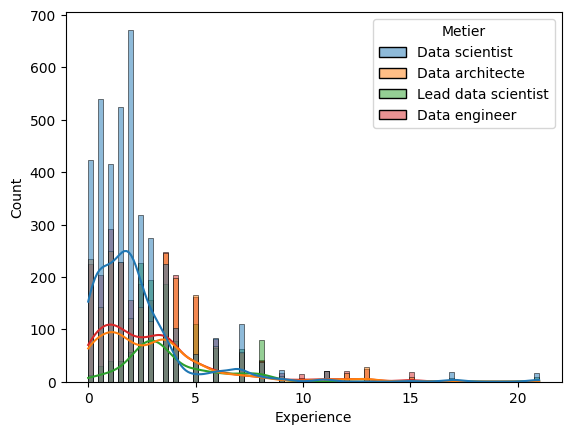

In [17]:
sns.histplot(df, x='Experience', hue='Metier', kde=True, )

<AxesSubplot:xlabel='Experience', ylabel='Count'>

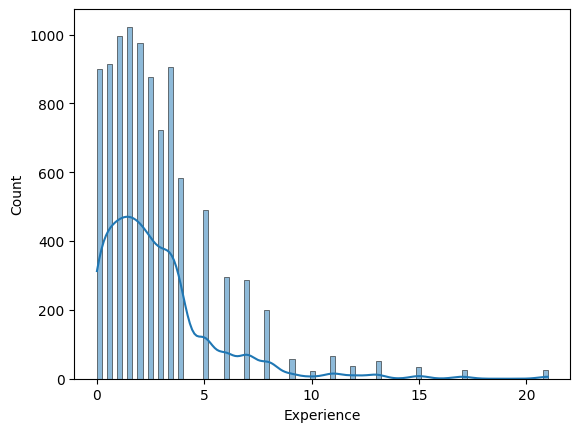

In [154]:
sns.histplot(df, x='Experience', kde=True, )

# Question 5:
Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités : débutant, confirmé, avancé et expert. Veuillez expliquer votre choix de la règle de transformation.  

In [18]:
np.array(df.Experience.dropna())

array([ 1.,  3.,  3., ...,  1., 17.,  0.])

In [153]:
np.percentile(df.Experience.dropna(), q=75)

3.5

**Explication:** 

J'ai choisi d'utiliser la fonction percentile de numpy pour transformer la colonne 'Experience'. En effet, il valait trouver 3 seuils afin de pouvoir découper cette variable continue en 4 modalités: le label débutant representera le quart des personnes avec le moins d'experiences (valeur inférieur au premier quartile), confirmé: le quart des personnes avec une experience inférieures à la médianne, avancé: le quart des personnes avec une experience inférieures au deuxième quatile et expert: les personnes avec une experience supérieur au deuxième quartile.

Cela permet d'avoir une labelisation équilibrée et aura pour conséquence des performace plus intéressante de notre modèle (moins sensible aux outliers).

In [20]:
experience_labellizer(df).head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,confirmé,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,avancé,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,avancé,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,confirmé,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,avancé,Bordeaux


# Question 6:
Quelles sont les 5 technologies les plus utilisées ? Faites un graphique.

In [21]:
from collections import Counter

technologies = Counter(list(df.Technologies.str.split('/').explode()))
technologies = dict(sorted(technologies.items(), key=lambda item: item[1], reverse=True))
#technologies

In [22]:
technologies.keys()

dict_keys(['Python', 'R', 'SQL', 'Java', 'Hadoop', 'Excel', 'C++', 'Spark', 'Linux', 'MongoDB', 'VBA', 'machine learning', 'SAS', 'Docker', 'Matlab', 'Hive', 'Tensorflow', 'Elasticsearch', 'Big data', 'C', 'Kibana', 'AWS', 'GNU', 'Teradata', '', 'scikit-learn', 'Machine learning', 'Anglais', 'Pyspark', 'HDFS', 'SPSS', 'Microsoft Azure', 'MariaDB', 'Scikit-learn', 'Scala', 'Cassandra', 'Matplotlib', 'AI', 'Scoring', 'Vertica', 'Tableau', 'Pycharm', 'Kafka', 'NoSQL', 'Deep learning', 'PostgreSQL', 'Yarn', 'Map-Reduce', 'PIG', 'HBASE', 'PySpark', 'anglais', 'numpy', 'Redshift', 'NoSQ', 'Hadoop(HDFS)', 'ORACLE', 'MySQL', 'Windows', 'Perl', 'Ruby'])

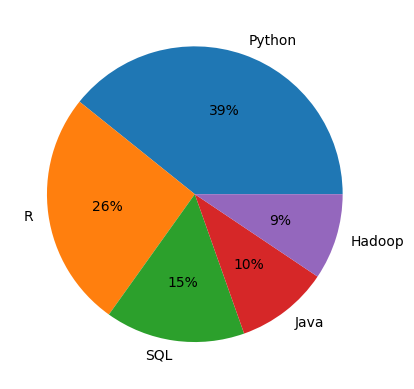

In [23]:
top5 = list(technologies.keys())[:5]
top5value = list(technologies.values())[:5]

pieChart = mp.pyplot.pie(top5value, labels=top5, autopct='%0.0f%%', )

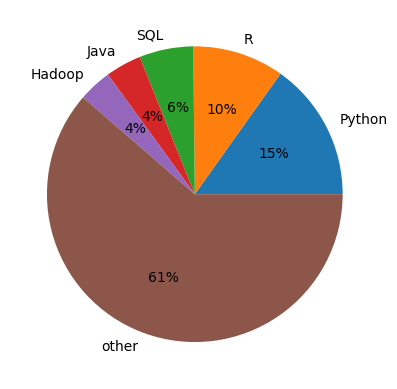

In [24]:
top5.append('other')
top5value.append(sum(list(technologies.values())[5:]))

pieChart = mp.pyplot.pie(top5value, labels=top5, autopct='%0.0f%%')

# Question 7:
Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître le nombre de clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.  
1. Justifier le nombre de clusters   
2. Justifier la performance de votre algorithme grâce à une métrique.  
3. Interpréter votre résultat.  

In [25]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


In [43]:
df.Entreprise.unique().size

1383

In [78]:
# etudier lien variable categorielle avec la colonne a predire
company = df.pivot_table(
    index="Metier",
    columns="Entreprise",
    values=None,
    aggfunc="count").Ville.fillna(0)

company

Entreprise,10x Genomics,1871,23andMe,2M Research Services,3Q Digital,605,7Park Data,84.51°,A+E Networks,A-Line Staffing,...,exp,fractalanalytics,h2o.ai,"iHeartMedia, Inc.",raag solutions,thoughtmatrix,true[x],xentity corporation,Øptimus Consulting,쿠팡
Metier,,,,,,,,,,,,,,,,,,,,,
Data architecte,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0
Data engineer,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,1.0,0.0
Data scientist,1.0,1.0,15.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,...,1.0,2.0,7.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0
Lead data scientist,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
companyOfInterestList = []
for comp in company.columns:
    if (company[comp] == company.loc['Data engineer', comp]).all():
        companyOfInterestList.append(comp)
        
len(companyOfInterestList)

315

In [26]:
df.Ville.unique().size

14

In [48]:
df.pivot_table(
    index="Metier",
    columns="Ville",
    values=None,
    aggfunc="count").Diplome.fillna(0)

Ville,Bordeaux,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Rouen,Strasbourg,Toulon,Toulouse
Metier,,,,,,,,,,,,,,
Data architecte,149,24,173,413,351,22,77,40,434,75,59,82,38,186
Data engineer,181,22,200,418,421,22,90,50,450,91,76,63,41,222
Data scientist,268,48,306,707,586,37,133,73,867,142,140,128,78,352
Lead data scientist,92,4,92,237,187,6,65,20,260,51,40,36,29,109


In [27]:
df.Diplome.unique()

array(['Master', 'Phd', 'Bachelor', 'No diploma'], dtype=object)

In [50]:
df.pivot_table(
    index="Metier",
    columns="Diplome",
    values=None,
    aggfunc="count").Entreprise.fillna(0)

Diplome,Bachelor,Master,No diploma,Phd
Metier,,,,
Data architecte,425,1060,407,227
Data engineer,326,1273,445,299
Data scientist,437,1893,81,1449
Lead data scientist,199,726,24,275


In [42]:
list(set(df.Technologies.str.replace('/', ' ').str.split().explode()))[:5]



['PostgreSQL', 'Deep', 'Tableau', 'Java', 'R']

In [9]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df = pd.read_csv('data/data.csv')
df.Experience = df.Experience.str.replace(',', '.').astype(float)

technologies = list(set(
    df.Technologies.str.replace('/', ' ').str.split().explode()))

firstQuartile = np.percentile(df.Experience.dropna(), q=25)
median = np.percentile(df.Experience.dropna(), q=50)
secondQuartile = np.percentile(df.Experience.dropna(), q=75)

company = df.pivot_table(
    index="Metier",
    columns="Entreprise",
    values=None,
    aggfunc="count").Ville.fillna(0)
companyOfInterestList = []
for comp in company.columns:
    if (company[comp] == company.loc['Data engineer', comp]).all():
        companyOfInterestList.append(comp)


def labellizer(x: pd.DataFrame) -> pd.DataFrame:
    """
    This function returns a LabelEncoder with the right format for 
    ColumnTransformer.

    Args:
        x (pd.DataFrame): a Dataset of a categorical column.

    Returns:
        pd.DataFrame: a Dataset of a numerical column.
    """
    return pd.DataFrame(LabelEncoder().fit_transform(x))

def tech_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    """
    This function returns a OneHotEncoder of the column Technologies 
    after cleaning the raw textual informations.

    Args:
        x (pd.DataFrame): a Dataset of Technologie colomn, a categorical
        column.

    Returns:
        pd.DataFrame: a Dataset with as many columns as technologies 
        with 1 if known by the worker and 0 else.
    """
    new = pd.DataFrame(0, columns=technologies, index=df.index)
    for skills in pd.DataFrame(x).itertuples():
        for techno in technologies:
            if techno in skills.Technologies:
                new.loc[skills.Index, techno] = 1
    return new


def diploma_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    """
    This function returns an ordened LabelEncoder of the column
    Diplome.

    Args:
        x (pd.DataFrame): a Dataset of Diploma colomn, a categorical column.

    Returns:
        pd.DataFrame: a Dataset of an ordinal column (low to high).
    """
    x = x.Diplome
    def helper_function(y: str) -> int:
        if y == 'No diploma':
            return 0
        if y == 'Bachelor':
            return 1
        if y == 'Master':
            return 2
        else:
            return 3
    return pd.DataFrame(x.apply(lambda z: helper_function(z)))


def exp_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    """
    This function returns an ordened LabelEncoder of the column
    Experience.

    Args:
        x (pd.DataFrame): a Dataset of Experience colomn, a categorical
        column.

    Returns:
        pd.DataFrame: a Dataset of an ordinal column (low to high).
    """
    x = x.Experience.str.replace(',', '.').astype(float)
    def helper_function(y: float) -> int:
        if y < firstQuartile:
            return 0 #"débutant"
        elif y < median:
            return 1 #"confirmé"
        elif y < secondQuartile:
            return 2 #"avancé"
        else:
            return 3 #"expert"
    
#    return pd.DataFrame(x.apply(helper_function))
    return OneHotEncoder().fit_transform(x.apply(helper_function))


def comp_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    """
    This function returns a OneHotEncoder of the column Entreprise 
    after cleaning the list of entreprise that matters, which means
    the only where the number of workers in each fields is different 
    and not always the same.

    Args:
        x (pd.DataFrame): a Dataset of Entreprise colomn, a categorical
        columns.

    Returns:
        pd.DataFrame: a Dataset with as many columns as entreprise that
        matters with 1 if the worker work in and 0 else.
    """
    new = pd.DataFrame(0, columns=companyOfInterestList, index=df.index)
    for company in pd.DataFrame(x).itertuples():
        if company.Entreprise in companyOfInterestList:
                new.loc[company.Index, company.Entreprise] = 1
    return new


preproc = ColumnTransformer(
    transformers = [
        #('Entreprise', FunctionTransformer(labellizer), ['Entreprise']),
        ('Entreprise', FunctionTransformer(comp_labellizer), ['Entreprise']),
        ('Techologies', FunctionTransformer(tech_labellizer), ['Technologies']),
        ('Diplome', OneHotEncoder(), ['Diplome']),
        #('Diplome', FunctionTransformer(diploma_labellizer), ['Diplome']),
        ('Experience', FunctionTransformer(exp_labellizer), ['Experience']),
        ('Ville', OneHotEncoder(), ['Ville']) 
        #('Ville', FunctionTransformer(labellizer), ['Ville'])
        ]
    )

In [106]:
LabelEncoder().fit_transform(df.Entreprise)

array([1075,  797,  401, ...,  157, 1177, 1300])

In [107]:
tech_labellizer(df.Technologies).head()

,PostgreSQL,Deep,Tableau,Java,R,C,Perl,Docker,Vertica,Map-Reduce,...,HDFS,Scala,Machine,Teradata,Cassandra,SPSS,MySQL,Hive,MariaDB,Big
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df = pd.read_csv('data/data.csv')

X = df.drop('Metier', inplace=False, axis=1)
y = df.Metier

X.head()

,Entreprise,Technologies,Diplome,Experience,Ville
0,Sanofi,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [ ]:
columns = ['Entreprise']
columns.extend(list(set(
    df.Technologies.str.replace('/', ' ').str.split().explode())))
columns.extend(['Diplome', 'Experience', 'Ville'])
pd.DataFrame(preproc.fit_transform(X), columns=columns).head()

In [109]:
from sklearn.cluster import KMeans

pl = Pipeline([
    ('preprocessor', preproc), 
    ('kmeans', KMeans(n_clusters=4))
])
    
pl.fit(X)
pl.predict(X)

array([0, 2, 1, ..., 3, 3, 3], dtype=int32)

In [110]:
new = df.copy()
new['Predictions'] = pl.predict(X)
new.pivot_table(
    index="Predictions",
    columns="Metier",
    values=None,
    aggfunc="count").Entreprise.fillna(0)

Metier,Data architecte,Data engineer,Data scientist,Lead data scientist
Predictions,,,,
0,90.0,357.0,811.0,174.0
1,0.0,0.0,1776.0,787.0
2,2029.0,1986.0,0.0,0.0
3,0.0,0.0,1273.0,263.0


## Explication 

**Nombre de cluster**: 4, parce qu'on souhaite déterminer 4 métiers différents.

- With LabelEncoder: 45.575%
- With OneHotEncoder: 46.086%
- With EntrepriseEncoder: 43.399%

**Métrique**: classification binaire, 

ie, on choisit les labels 0, 1, 2 et 3 de façon à optimiser le score qui consiste à faire la compte des prédictions correctes divisée par le nombre de prédiction. Les scores sont plutôt bon comparé à un modèle qui predirait de manière aléatoire ou en choisissant toujours le même (25% en moyenne).

**Obsvervation**: 

la classification nonsupervisée arrive déjà à faire la distinction entre deux groupe: data architecte & data engineer (groupe 1), et data scientist et lead data scientist (groupe 2), à 89.345% (sera surement utilisé comme feature par la suite et cela est peut être du aux technologies et années d'expériences)

In [112]:
print((2029.0+1986.0+90.0+357.0+1776.0+787.0+1273.0+263.0)/9582)
print((2029+357+1273+787)/9582)
print((2029+357+1776.0+263)/9582)
print((773.0+1369.0+1097.0+1177.0)/9582)
print((924.0+1807.0+879.0+757.0)/9582)

0.8934460446670841
0.46399499060738886
0.46180338134001253
0.46086412022542267
0.4557503652682112


# Question 8:
Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix  
1. Justifier la performance de votre algorithme grâce à une métrique.  
2. Interpréter votre résultat. 

In [6]:
df.dropna(subset=['Metier']).head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [10]:
from sklearn.model_selection import train_test_split


df = pd.read_csv('data/data.csv')
df.dropna(subset=['Metier'], inplace=True)
experience = df.Experience.str.replace(',', '.').astype(float)

columns = ['Entreprise', 'Technologies', 'Diplome', 'Experience', 'Ville'] 
X = df[columns]
y = df.Metier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

technologies = list(set(
    df.Technologies.str.replace('/', ' ').str.split().explode()))

firstQuartile = np.percentile(experience.dropna(), q=25)
median = np.percentile(experience.dropna(), q=50)
secondQuartile = np.percentile(experience.dropna(), q=75)

company = df.pivot_table(
    index="Metier", columns="Entreprise", values=None,
    aggfunc="count").Ville.fillna(0)
companyOfInterestList = []
for comp in company.columns:
    if (company[comp] == company.loc['Data engineer', comp]).all():
        companyOfInterestList.append(comp)
        

def tech_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    new = pd.DataFrame(0, columns=technologies, index=x.index)
    for skills in pd.DataFrame(x).itertuples():
        for techno in technologies:
            if techno in skills.Technologies:
                new.loc[skills.Index, techno] = 1
    return new


def exp_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    x = x.Experience.str.replace(',', '.').astype(float)
    def helper_function(y: float) -> int:
        if y < firstQuartile:
            return 0 #"débutant"
        elif y < median:
            return 1 #"confirmé"
        elif y < secondQuartile:
            return 2 #"avancé"
        elif y > secondQuartile:
            return 3 #"expert"
        else:
            return 0
    
#    return pd.DataFrame(x.apply(helper_function))
    return OneHotEncoder().fit_transform(pd.DataFrame(x.apply(helper_function)))


def comp_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    new = pd.DataFrame(0, columns=companyOfInterestList, index=x.index)
    for company in pd.DataFrame(x).itertuples():
        if company.Entreprise in companyOfInterestList:
                new.loc[company.Index, company.Entreprise] = 1
    return new


def kmeans_labellizer(x: pd.DataFrame) -> pd.DataFrame:
    transformers = [
        ('Entreprise', FunctionTransformer(comp_labellizer), ['Entreprise']),
        ('Techologies', FunctionTransformer(tech_labellizer), ['Technologies']),
        ('Diplome', OneHotEncoder(), ['Diplome']),
        ('Experience', FunctionTransformer(exp_labellizer), ['Experience']),
        ('Ville', OneHotEncoder(), ['Ville']) 
    ]
    preproc = ColumnTransformer(transformers=transformers)
    pl = Pipeline([
        ('preprocessor', preproc), 
        ('kmeans', KMeans(n_clusters=2))
    ])
    pl.fit(x)
    return pd.DataFrame(pl.predict(x))


preproc = ColumnTransformer(
    transformers = [
        ('Entreprise', FunctionTransformer(comp_labellizer), ['Entreprise']),
        ('Techologies', FunctionTransformer(tech_labellizer), ['Technologies']),
        ('Diplome', OneHotEncoder(), ['Diplome']),
        ('Experience', FunctionTransformer(exp_labellizer), ['Experience']),
        ('Ville', OneHotEncoder(), ['Ville']), 
        #('EngineerVsScientist', FunctionTransformer(kmeans_labellizer), columns)
        ]
    )

In [11]:
X_train

,Entreprise,Technologies,Diplome,Experience,Ville
7836,General Electric,Docker/GNU/Windows/Linux/Python,Bachelor,"3,5",Toulouse
7693,Brigham & Women's Hospital(BWH),Java/AWS/Elasticsearch/Kibana,Phd,0,Bordeaux
2316,Ball Aerospace,Map-Reduce/HDFS/PIG/HBASE/Python/Cassandra,Master,"0,5",Paris
8564,Blueprint Medicines,VBA/Python/Excel/R,Master,NaN,Toulouse
6254,xentity corporation,Python/Spark/GNU/Linux,Master,1,Toulon
...,...,...,...,...,...
5745,Ball Aerospace,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,9,Marseille
5199,Merck,Java/Linux/GNU/Docker,Phd,1,Paris
5398,Ontoforce NV,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,"0,5",Paris
861,KPMG,Python/Pyspark/Spark,Master,"3,5",Toulouse


In [12]:
pd.DataFrame(preproc.fit_transform(X)).astype(int).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.neighbors import KNeighborsClassifier

pl = Pipeline([
    ('preprocessor', preproc), 
    ('kmeans', KNeighborsClassifier(n_neighbors=7))
])
    
pl.fit(X, y)
pl.predict(X)

array(['Data scientist', 'Data architecte', 'Data scientist', ...,
       'Data scientist', 'Data scientist', 'Data scientist'], dtype=object)

In [14]:
new = df.copy()
new['Predictions'] = pl.predict(X)
new.pivot_table(
    index="Predictions",
    columns="Metier",
    values=None,
    aggfunc="count").Entreprise.fillna(0)

Metier,Data architecte,Data engineer,Data scientist,Lead data scientist
Predictions,,,,
Data architecte,2030.0,27.0,19.0,10.0
Data engineer,53.0,2308.0,3.0,3.0
Data scientist,36.0,8.0,3696.0,769.0
Lead data scientist,0.0,0.0,142.0,442.0


In [15]:
pl.score(X, y) #0.892920631600962

0.8875875771201506

In [16]:
from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
    ('preprocessor', preproc), 
    ('random', RandomForestClassifier())
])
    
pl.fit(X, y)
pl.score(X, y)

0.957753842936317

In [17]:
new = df.copy()
new['Predictions'] = pl.predict(X)
new.pivot_table(
    index="Predictions",
    columns="Metier",
    values=None,
    aggfunc="count").Entreprise.fillna(0)

Metier,Data architecte,Data engineer,Data scientist,Lead data scientist
Predictions,,,,
Data architecte,2106.0,0.0,20.0,6.0
Data engineer,0.0,2343.0,0.0,0.0
Data scientist,13.0,0.0,3729.0,252.0
Lead data scientist,0.0,0.0,111.0,966.0


In [18]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('kmeans', KNeighborsClassifier(n_neighbors=7))
])

pl.fit(X_train, y_train)
print(pl.score(X_train, y_train))
print(pl.score(X_test, y_test))

0.8824722959263306
0.861850443599493


In [19]:
pl = Pipeline([
    ('preprocessor', preproc), 
    ('random', RandomForestClassifier(max_depth=20))
])

pl.fit(X_train, y_train)
print(pl.score(X_train, y_train))
print(pl.score(X_test, y_test))

0.9193070079600437
0.8789607097591888


In [28]:
score = pd.DataFrame(columns=['train', 'test'])
for depth in range(5, 30, 2):
    pl = Pipeline([
        ('preprocessor', preproc), 
        ('random', RandomForestClassifier(max_depth=depth))
    ])

    pl.fit(X_train, y_train)
    score = score.append({'train': pl.score(X_train, y_train),
                          'test': pl.score(X_test, y_test)}, ignore_index=True)
    
score.index = range(5, 30, 2)

<AxesSubplot:>

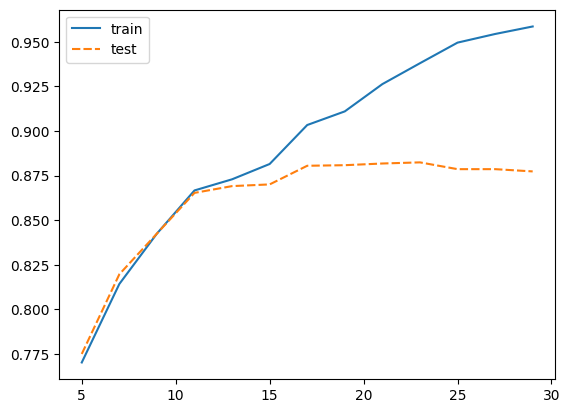

In [29]:
sns.lineplot(data=score)

## Explication 

**Métrique**: classification binaire, 

le score qui consiste à faire la compte des prédictions correctes divisée par le nombre de prédiction. 

**Performance**:
- KNeighborsClassifier: 
  - train:    88.247%
  - test:     86.185%
- RandomForestClassifier: 
  - train:    91.853%
  - test:     87.801%
  
les résultats sont plutôt bon, encore un fois comparé à un modèle aléatoire (25% de reussite, une chance sur quatre), on à un modèle bien plus efficace. Sur 100 personnes, le moèdele arrive à prédire correctement le métier de 86-87 personnes. 

**Interpretation**: 

Si on regarde en détail, on peut voir que les erreurs sont globalement sur la différence entre lead data scientist et data scientist. Cette différence peut parfois ne pas être expliquée par les données ici présentées, en effet, certaines personnes souhaitent rester du coté technique toute leur vie tandis que certaines cherchent des fonctions managériales rapidement. 